In [548]:
import pandas as pd

In [549]:
df=pd.read_csv("Spotify_Playlist.csv")

In [550]:
# artist - Name of artist
# album -  Name of album
# track_name - Name of the song
# track_id - spotify ID for each song
# danceability - Higher the value , easier to dance to the song
# energy - Higher the value , more the energy
# key - The key the track is in
# loudness - higher the value louder the song
# mode - Mode indicates the modality (major or minor) of a track, the type of scale
        # from which its melodic content is derived. Major is represented by 1 and minor is 0.

# speechiness - higher the value , the more spoken word it contains
# instrumentalness - 
# liveness - higher the value the more likely it is a live recording
# valence - higher the value , more positive the song mood
# tempo - beats per minute
# duration_ms - duration of song in milliseconds

In [551]:
df.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Radio Moscow,Brain Cycles,250 Miles,3drJvEvfMS5mnJ4JtmkM5S,0.467,0.422,9,-11.077,0,0.0703,0.169000,0.0960,0.588,76.818,292000,4
1,Milo Greene,Milo Greene,1957,08cXy6KUizaAelYXtcew3w,0.388,0.595,1,-9.799,1,0.0325,0.000056,0.1780,0.596,190.043,204213,4
2,The Smashing Pumpkins,Mellon Collie And The Infinite Sadness (Deluxe...,1979 - Remastered 2012,5QLHGv0DfpeXLNFo7SFEy1,0.767,0.787,3,-9.897,1,0.0331,0.583000,0.0513,0.964,126.879,266200,4
3,Lucifer,Lucifer I,Abracadabra,4tLRIAfjJmTFtro5fPyiAx,0.391,0.670,2,-7.096,1,0.0289,0.750000,0.0563,0.106,134.890,354266,4
4,Cigarettes After Sex,Affection,Affection,4eVNSHRazoHgfYGv3AYFyZ,0.415,0.425,7,-11.232,1,0.0250,0.908000,0.1050,0.248,89.839,311000,4


In [552]:
ff=df

In [553]:
df.shape

(411, 16)

In [554]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,4.110000e+02,411.000000
mean,0.493628,0.665121,5.209246,-7.753170,0.778589,0.052649,0.143603,0.174205,0.402535,120.773017,2.655939e+05,3.878345
std,0.150861,0.238433,3.457055,3.715933,0.415703,0.042327,0.270342,0.149044,0.242607,30.326114,9.076497e+04,0.424601
min,0.115000,0.003420,0.000000,-30.427000,0.000000,0.023600,0.000000,0.015500,0.032100,53.297000,5.576000e+04,1.000000
25%,0.393000,0.495500,2.000000,-9.771000,1.000000,0.030500,0.000003,0.094600,0.210500,96.564500,2.144400e+05,4.000000
50%,0.506000,0.706000,5.000000,-6.931000,1.000000,0.037700,0.001190,0.116000,0.362000,118.995000,2.473270e+05,4.000000
75%,0.596000,0.865500,8.000000,-5.044000,1.000000,0.055450,0.102500,0.190000,0.564000,142.543000,2.919535e+05,4.000000
max,0.933000,0.998000,11.000000,-1.688000,1.000000,0.340000,0.979000,0.983000,0.975000,204.094000,1.120098e+06,5.000000


In [555]:
df.corr()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,-0.057396,0.044054,0.006995,0.089806,-0.194896,-0.191857,-0.100814,0.523270,-0.210881,-0.310001,0.136520
energy,-0.057396,1.000000,0.076178,0.774633,-0.200355,0.363439,-0.024429,0.185776,0.319581,0.160057,0.067133,0.131002
key,0.044054,0.076178,1.000000,0.031416,-0.179830,0.043481,-0.041534,-0.017128,0.077468,-0.003703,0.062088,-0.024156
loudness,0.006995,0.774633,0.031416,1.000000,-0.094931,0.202928,-0.228611,0.135443,0.279017,0.115771,-0.008182,0.206528
mode,0.089806,-0.200355,-0.179830,-0.094931,1.000000,-0.246109,-0.060344,-0.029930,-0.023377,0.000677,-0.117930,-0.083884
speechiness,-0.194896,0.363439,0.043481,0.202928,-0.246109,1.000000,-0.000753,0.122489,-0.071724,0.160530,0.131371,-0.064634
instrumentalness,-0.191857,-0.024429,-0.041534,-0.228611,-0.060344,-0.000753,1.000000,-0.074492,-0.209600,-0.061509,0.362315,-0.088887
liveness,-0.100814,0.185776,-0.017128,0.135443,-0.029930,0.122489,-0.074492,1.000000,-0.000138,0.079605,-0.050579,-0.033840
valence,0.523270,0.319581,0.077468,0.279017,-0.023377,-0.071724,-0.209600,-0.000138,1.000000,0.049567,-0.290116,0.192698
tempo,-0.210881,0.160057,-0.003703,0.115771,0.000677,0.160530,-0.061509,0.079605,0.049567,1.000000,-0.075158,-0.032559


In [556]:
s=df.query('speechiness == 0.34')
s

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
364,Dream Theater,Untethered Angel,Untethered Angel,3z1M3nvvKkchcUr4OjlMLP,0.221,0.944,1,-5.337,1,0.34,0.0164,0.0926,0.248,88.719,374893,4


In [557]:

df.query('liveness > 0.7')

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
54,Still Patient?,Chameleon,Chameleon,3eCIDRQJz1TQMXi38kDLcc,0.355,0.897,1,-6.494,0,0.0853,0.197000,0.891,0.153,149.928,312480,4
165,The Corrs,Talk On Corners,I Never Loved You Anyway,3ySeAH0zT6uTssFVmHZM1T,0.551,0.670,7,-6.588,1,0.0303,0.000000,0.711,0.380,96.938,233560,4
274,The Cure,Disintegration (Deluxe Edition),Pictures of You - Live at Wembley 07/89 - Remi...,7i2wCdelxY5tPXg791Gju0,0.515,0.901,9,-5.558,1,0.0384,0.031700,0.983,0.417,90.296,424467,4
290,Mad Season,Above (Deluxe Edition),River Of Deceit - Live at The Moore,0EuSnlrpdWZzzueqy1Fo0d,0.267,0.533,0,-9.909,1,0.0322,0.002960,0.970,0.409,187.678,310240,4
293,The 1975,"DH00278 (Live from The O2, London. 16.12.16)","Robbers - Live From The O2, London. 16.12.16",1wJIu1gNJTwXHZztdkNncf,0.486,0.776,4,-7.436,1,0.0388,0.000061,0.940,0.331,99.593,243643,4
324,Various Artists,Gothic Rock 3 - Black on Black,Spirit Walker,0NLuyHeITS20TXkA46R4Vn,0.306,0.973,9,-3.891,0,0.0761,0.032500,0.893,0.224,163.990,216467,4
329,Angus & Julia Stone,Spotify Sessions,Stay With Me - Live From Spotify Berlin,6itWAD2WxmAVQgWuk85yXx,0.614,0.106,0,-22.097,1,0.0413,0.050900,0.708,0.169,75.890,174373,4
388,A Place To Bury Strangers,We've Come so Far,We've Come so Far,1Umv4DK0emQ9kRhFdk9gqy,0.185,0.976,7,-1.688,0,0.0746,0.548000,0.874,0.221,119.940,307533,3


In [558]:
df["valence"].max()
df.query('valence > 0.9')

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
2,The Smashing Pumpkins,Mellon Collie And The Infinite Sadness (Deluxe...,1979 - Remastered 2012,5QLHGv0DfpeXLNFo7SFEy1,0.767,0.787,3,-9.897,1,0.0331,0.583000,0.0513,0.964,126.879,266200,4
8,Cage The Elephant,Cage The Elephant,Ain't No Rest for the Wicked,3kb72STxc2959ZqsTwu52i,0.634,0.849,0,-7.075,1,0.1050,0.000000,0.3630,0.919,156.004,175493,4
18,She Past Away,Narin Yalnızlık,Asimilasyon,3A6pYIUJ7jspDJdab9pCPo,0.575,0.899,2,-4.328,1,0.0473,0.865000,0.0805,0.905,159.993,252094,4
29,Jesse McCartney,Beautiful Soul,Beautiful Soul,2qXKFmKjFzhSGG7kPzoK8n,0.651,0.662,9,-4.340,1,0.0469,0.000000,0.0267,0.933,89.979,214227,4
32,Matt Nathanson,Sings His Sad Heart,Best Drugs,204OOAOnmbBayjheR5PTPj,0.735,0.802,0,-3.933,1,0.0458,0.000000,0.0526,0.961,98.992,184000,4
101,Various Artists,Assassin's Creed 4: Black Flag (Sea Shanty Edi...,Drunken Sailor,0mGVZddgCy1jYBnWvKCV8H,0.689,0.283,5,-6.011,1,0.0387,0.000000,0.1160,0.970,160.241,89520,4
126,The Aggrolites,The Aggrolites,Funky Fire,23ocdrkMsbIT8Y5zYYFGLR,0.813,0.825,0,-5.564,1,0.0685,0.683000,0.0528,0.964,123.340,250987,4
168,Ramones,Road to Ruin (Expanded 2005 Remaster),I Wanna Be Sedated - 2002 Remaster,6vvmYYUvGXtZLU8msxKvzF,0.597,0.960,11,-3.989,1,0.0420,0.000029,0.1050,0.937,163.017,149467,4
192,Boy George,At Worst...The Best Of Boy George And Culture ...,Karma Chameleon,48O0GrGJWml3DzHhC5sJ7a,0.676,0.577,10,-12.031,1,0.0365,0.000000,0.1480,0.934,91.980,241600,4
219,Joy Division,Substance,Love Will Tear Us Apart - 2010 Remaster,1r8oPEXqnhUVgkUkJNqEuF,0.525,0.902,2,-8.662,1,0.0368,0.691000,0.1370,0.907,146.830,204621,4


In [559]:
df.query('duration_ms > 500000')

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
43,Dream Theater,A Dramatic Turn of Events,Bridges in the Sky,2eBHUYKjKhcFwSNmPkZday,0.524,0.944,7,-6.697,1,0.0911,0.00668,0.1090,0.1200,108.785,661427,3
130,Letters From The Colony,Vignette,Galax,1dITa0REcdL0R7UM2mjPzm,0.261,0.862,7,-7.050,1,0.0546,0.51500,0.3570,0.1330,109.977,500001,4
136,Clouds Taste Satanic,The Glitter of Infinite Hell,Greed,3dQ2yEspbVq19i5bq2PAeZ,0.262,0.525,7,-9.601,1,0.0392,0.90200,0.1110,0.0695,107.621,1120098,4
223,Low,I Could Live In Hope,Lullaby,1De66xUavye2fNqhCwtgyo,0.372,0.232,11,-14.246,0,0.0423,0.62900,0.1120,0.0924,125.798,589107,4
228,Metallica,Master of Puppets (Remastered Deluxe Box Set),Master of Puppets (Remastered),54bm2e3tk8cliUz3VSdCPZ,0.539,0.828,4,-9.108,0,0.0350,0.42100,0.1540,0.5620,105.250,515387,4
240,Immortal,Mighty Ravendark,Mighty Ravendark,69ANeIfCzbOonHEOQtLr8n,0.164,0.993,4,-5.581,0,0.0944,0.63100,0.0946,0.0474,104.987,554863,4
258,Son of a Witch,Thrones in the Sky,New Monster,77j9pklA25tPrcUJwQrJcZ,0.184,0.906,5,-7.257,0,0.0900,0.02820,0.1210,0.5100,174.299,608613,4
301,Firtan,Seegang,Seegang,0yD43guef0ewRLGHG33Vcc,0.271,0.941,1,-7.496,0,0.0985,0.07540,0.1770,0.1090,144.946,516535,4
361,Death Angel,The Ultra-Violence,The Ultra-Violence,20bJTQOaoHqeCHBhqIgcTl,0.238,0.990,4,-3.725,0,0.2260,0.69200,0.1530,0.1940,109.438,633600,4
373,1000mods,Super Van Vacation,Vidage,0GHRVjxxKDpFBHKMfoTiQ2,0.416,0.722,5,-7.746,1,0.0379,0.78900,0.1380,0.3050,119.018,528111,4


In [560]:
df["duration_ms"]=(df["duration_ms"]/(1000*60))%60  #Convert to minutes

In [561]:
df.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Radio Moscow,Brain Cycles,250 Miles,3drJvEvfMS5mnJ4JtmkM5S,0.467,0.422,9,-11.077,0,0.0703,0.169000,0.0960,0.588,76.818,4.866667,4
1,Milo Greene,Milo Greene,1957,08cXy6KUizaAelYXtcew3w,0.388,0.595,1,-9.799,1,0.0325,0.000056,0.1780,0.596,190.043,3.403550,4
2,The Smashing Pumpkins,Mellon Collie And The Infinite Sadness (Deluxe...,1979 - Remastered 2012,5QLHGv0DfpeXLNFo7SFEy1,0.767,0.787,3,-9.897,1,0.0331,0.583000,0.0513,0.964,126.879,4.436667,4
3,Lucifer,Lucifer I,Abracadabra,4tLRIAfjJmTFtro5fPyiAx,0.391,0.670,2,-7.096,1,0.0289,0.750000,0.0563,0.106,134.890,5.904433,4
4,Cigarettes After Sex,Affection,Affection,4eVNSHRazoHgfYGv3AYFyZ,0.415,0.425,7,-11.232,1,0.0250,0.908000,0.1050,0.248,89.839,5.183333,4


In [562]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [563]:
df.corr()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,-0.057396,0.044054,0.006995,0.089806,-0.194896,-0.191857,-0.100814,0.523270,-0.210881,-0.310001,0.136520
energy,-0.057396,1.000000,0.076178,0.774633,-0.200355,0.363439,-0.024429,0.185776,0.319581,0.160057,0.067133,0.131002
key,0.044054,0.076178,1.000000,0.031416,-0.179830,0.043481,-0.041534,-0.017128,0.077468,-0.003703,0.062088,-0.024156
loudness,0.006995,0.774633,0.031416,1.000000,-0.094931,0.202928,-0.228611,0.135443,0.279017,0.115771,-0.008182,0.206528
mode,0.089806,-0.200355,-0.179830,-0.094931,1.000000,-0.246109,-0.060344,-0.029930,-0.023377,0.000677,-0.117930,-0.083884
speechiness,-0.194896,0.363439,0.043481,0.202928,-0.246109,1.000000,-0.000753,0.122489,-0.071724,0.160530,0.131371,-0.064634
instrumentalness,-0.191857,-0.024429,-0.041534,-0.228611,-0.060344,-0.000753,1.000000,-0.074492,-0.209600,-0.061509,0.362315,-0.088887
liveness,-0.100814,0.185776,-0.017128,0.135443,-0.029930,0.122489,-0.074492,1.000000,-0.000138,0.079605,-0.050579,-0.033840
valence,0.523270,0.319581,0.077468,0.279017,-0.023377,-0.071724,-0.209600,-0.000138,1.000000,0.049567,-0.290116,0.192698
tempo,-0.210881,0.160057,-0.003703,0.115771,0.000677,0.160530,-0.061509,0.079605,0.049567,1.000000,-0.075158,-0.032559


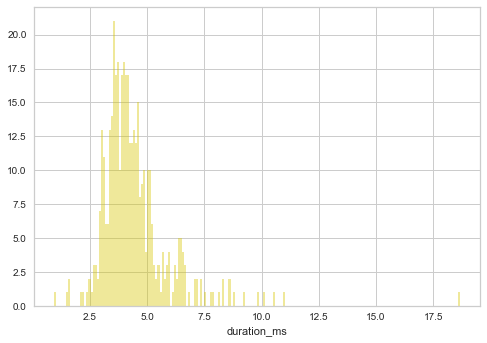

In [564]:
sns.distplot(df["duration_ms"] , bins=200 ,kde=False ,color="y")

In [565]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cluster_feature=["danceability", "loudness" ,"key" ,
                 "energy" ,"speechiness" ,"instrumentalness" ,
                 "liveness" ,"valence"]

cluster_features=["danceability", "loudness" ,
                 "energy" ,"instrumentalness" ,
                  "valence"]


df_cluster = df[cluster_features]
X = np.array(df_cluster)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X.shape

(411, 5)

In [566]:
df_cluster

,danceability,loudness,energy,instrumentalness,valence
0,0.467,-11.077,0.422,0.169000,0.588
1,0.388,-9.799,0.595,0.000056,0.596
2,0.767,-9.897,0.787,0.583000,0.964
3,0.391,-7.096,0.670,0.750000,0.106
4,0.415,-11.232,0.425,0.908000,0.248
...,...,...,...,...,...
406,0.642,-9.919,0.531,0.005490,0.193
407,0.603,-5.357,0.961,0.087400,0.680
408,0.630,-5.523,0.804,0.032200,0.847
409,0.392,-8.229,0.579,0.000000,0.440


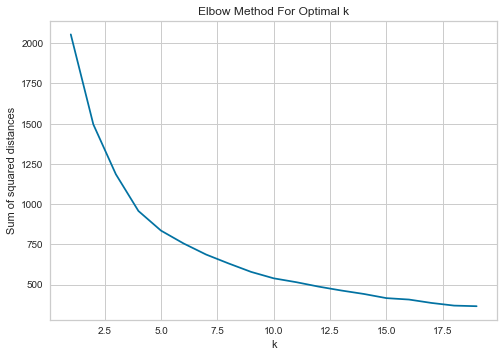

In [567]:
from sklearn.cluster import KMeans

ss_dist = []
K = range(1, 20)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++')
    km = km.fit(X)
    ss_dist.append(km.inertia_)
plt.plot(K, ss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()



In [568]:
#K-->4

In [569]:
from factor_analyzer import FactorAnalyzer

In [570]:
df_factor=df.drop(['artist', 'album', 'track_id' , 'track_name' ,'time_signature' ,'mode', 'key'],axis=1)
df_factor

,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.467,0.422,-11.077,0.0703,0.169000,0.0960,0.588,76.818,4.866667
1,0.388,0.595,-9.799,0.0325,0.000056,0.1780,0.596,190.043,3.403550
2,0.767,0.787,-9.897,0.0331,0.583000,0.0513,0.964,126.879,4.436667
3,0.391,0.670,-7.096,0.0289,0.750000,0.0563,0.106,134.890,5.904433
4,0.415,0.425,-11.232,0.0250,0.908000,0.1050,0.248,89.839,5.183333
...,...,...,...,...,...,...,...,...,...
406,0.642,0.531,-9.919,0.0299,0.005490,0.0933,0.193,109.497,2.930450
407,0.603,0.961,-5.357,0.0816,0.087400,0.3390,0.680,178.054,2.898967
408,0.630,0.804,-5.523,0.0744,0.032200,0.1070,0.847,162.048,4.194000
409,0.392,0.579,-8.229,0.0458,0.000000,0.1260,0.440,108.347,3.426800


In [571]:

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_factor)
kmo_model

0.5510462209819591

In [572]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4
0,0.769318,0.923981,0.186903,0.948401,-0.300362
1,0.124672,0.324328,-0.409563,1.230101,0.021353
2,-1.093899,1.671610,2.758006,0.486863,0.264429
3,1.266839,-1.643953,1.467075,-0.660993,-0.374552
4,2.300135,-0.621788,2.146599,-0.023582,-0.550468


In [573]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.41684635, 0.28518003, 0.17941613, 0.08115326, 0.03740423])

In [574]:
x_pca=x_pca.drop(columns=[3, 4])
x_pca

,0,1,2
0,0.769318,0.923981,0.186903
1,0.124672,0.324328,-0.409563
2,-1.093899,1.671610,2.758006
3,1.266839,-1.643953,1.467075
4,2.300135,-0.621788,2.146599
...,...,...,...
406,0.667979,0.908952,-0.508838
407,-1.844811,0.232630,0.483820
408,-1.895755,0.984773,0.445348
409,0.224025,-0.038624,-0.649502


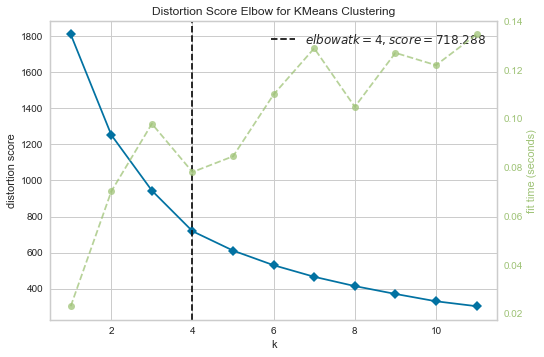

In [575]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(km, k=(1,12))
visualizer.fit(x_pca)
visualizer.show()

In [576]:
x_pca.shape

(411, 3)

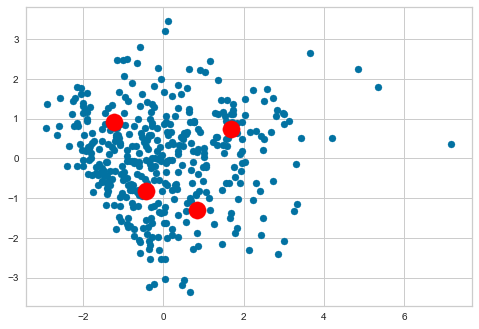

In [577]:
from yellowbrick.cluster import InterclusterDistance

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(x_pca)

plt.scatter(x_pca.iloc[:,0], x_pca.iloc[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

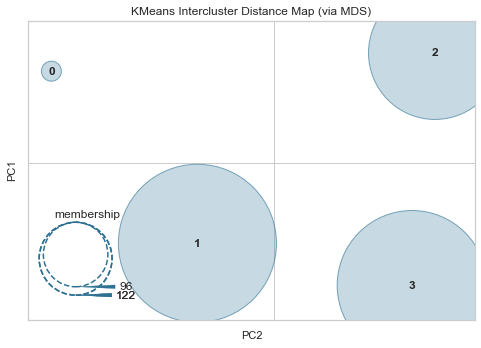

In [578]:
from yellowbrick.cluster import InterclusterDistance


visualizer = InterclusterDistance(kmeans)

visualizer.fit(kmeans)        # Fit the data to the visualizer
visualizer.show() 

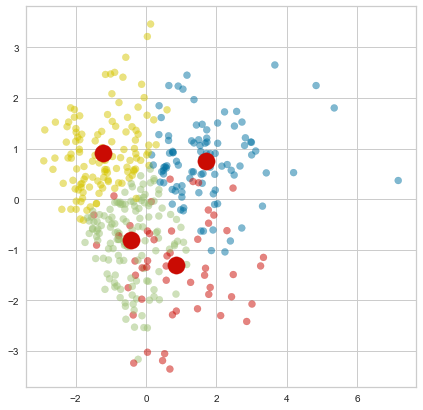

In [579]:
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b' , 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in y_kmeans]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_pca.iloc[:,0],x_pca.iloc[:,1], c= label_color, alpha=0.5) 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='r')
plt.show()

In [580]:

l=kmeans.labels_


In [581]:
ff

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Radio Moscow,Brain Cycles,250 Miles,3drJvEvfMS5mnJ4JtmkM5S,0.467,0.422,9,-11.077,0,0.0703,0.169000,0.0960,0.588,76.818,4.866667,4
1,Milo Greene,Milo Greene,1957,08cXy6KUizaAelYXtcew3w,0.388,0.595,1,-9.799,1,0.0325,0.000056,0.1780,0.596,190.043,3.403550,4
2,The Smashing Pumpkins,Mellon Collie And The Infinite Sadness (Deluxe...,1979 - Remastered 2012,5QLHGv0DfpeXLNFo7SFEy1,0.767,0.787,3,-9.897,1,0.0331,0.583000,0.0513,0.964,126.879,4.436667,4
3,Lucifer,Lucifer I,Abracadabra,4tLRIAfjJmTFtro5fPyiAx,0.391,0.670,2,-7.096,1,0.0289,0.750000,0.0563,0.106,134.890,5.904433,4
4,Cigarettes After Sex,Affection,Affection,4eVNSHRazoHgfYGv3AYFyZ,0.415,0.425,7,-11.232,1,0.0250,0.908000,0.1050,0.248,89.839,5.183333,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,The Stone Roses,Second Coming,Your Star Will Shine,6rFWGlacCe5hZ3uDk5Zhzv,0.642,0.531,4,-9.919,1,0.0299,0.005490,0.0933,0.193,109.497,2.930450,4
407,Twin Sages,Black Scribbles on a Piece of Paper,Your World IS NOT for ME,2J4q6Qa0GlcJhVe7FN4N7V,0.603,0.961,7,-5.357,1,0.0816,0.087400,0.3390,0.680,178.054,2.898967,4
408,"Now, Now",Saved,Yours,2HD1H7kVKbBgEUUjhEWJVL,0.630,0.804,7,-5.523,0,0.0744,0.032200,0.1070,0.847,162.048,4.194000,3
409,Desert Rock,Zikr,Zikr,6PaRuEAlsWRzLdW812r4Gp,0.392,0.579,0,-8.229,1,0.0458,0.000000,0.1260,0.440,108.347,3.426800,4


In [582]:
ff.insert(4, "Cluster",l, True)

In [583]:
ff

,artist,album,track_name,track_id,Cluster,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Radio Moscow,Brain Cycles,250 Miles,3drJvEvfMS5mnJ4JtmkM5S,2,0.467,0.422,9,-11.077,0,0.0703,0.169000,0.0960,0.588,76.818,4.866667,4
1,Milo Greene,Milo Greene,1957,08cXy6KUizaAelYXtcew3w,1,0.388,0.595,1,-9.799,1,0.0325,0.000056,0.1780,0.596,190.043,3.403550,4
2,The Smashing Pumpkins,Mellon Collie And The Infinite Sadness (Deluxe...,1979 - Remastered 2012,5QLHGv0DfpeXLNFo7SFEy1,3,0.767,0.787,3,-9.897,1,0.0331,0.583000,0.0513,0.964,126.879,4.436667,4
3,Lucifer,Lucifer I,Abracadabra,4tLRIAfjJmTFtro5fPyiAx,0,0.391,0.670,2,-7.096,1,0.0289,0.750000,0.0563,0.106,134.890,5.904433,4
4,Cigarettes After Sex,Affection,Affection,4eVNSHRazoHgfYGv3AYFyZ,0,0.415,0.425,7,-11.232,1,0.0250,0.908000,0.1050,0.248,89.839,5.183333,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,The Stone Roses,Second Coming,Your Star Will Shine,6rFWGlacCe5hZ3uDk5Zhzv,2,0.642,0.531,4,-9.919,1,0.0299,0.005490,0.0933,0.193,109.497,2.930450,4
407,Twin Sages,Black Scribbles on a Piece of Paper,Your World IS NOT for ME,2J4q6Qa0GlcJhVe7FN4N7V,3,0.603,0.961,7,-5.357,1,0.0816,0.087400,0.3390,0.680,178.054,2.898967,4
408,"Now, Now",Saved,Yours,2HD1H7kVKbBgEUUjhEWJVL,3,0.630,0.804,7,-5.523,0,0.0744,0.032200,0.1070,0.847,162.048,4.194000,3
409,Desert Rock,Zikr,Zikr,6PaRuEAlsWRzLdW812r4Gp,1,0.392,0.579,0,-8.229,1,0.0458,0.000000,0.1260,0.440,108.347,3.426800,4


In [586]:
ff.groupby(["Cluster"])["track_name"].count()

Cluster
0     54
1    139
2     96
3    122
Name: track_name, dtype: int64

In [604]:
cluster1=ff.query('Cluster == 3')
cluster1.tail(21)

,artist,album,track_name,track_id,Cluster,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
330,Bee Gees,Greatest,"Stayin' Alive - From ""Saturday Night Fever"" So...",3mRM4NM8iO7UBqrSigCQFH,3,0.703,0.826,10,-7.179,0,0.0341,0.006290,0.1790,0.945,103.564,4.756217,4
336,Donna Summer,On The Radio: Greatest Hits Volumes I & II,Sunset People,2DiPRnOsripIZYIRJAYYUo,3,0.744,0.547,9,-16.763,1,0.0528,0.013100,0.0685,0.935,140.856,4.548450,4
337,The Script,No Sound Without Silence,Superheroes,37sINbJZcFdHFAsVNsPq1i,3,0.491,0.885,3,-4.121,1,0.0395,0.000000,0.0741,0.641,166.992,4.091117,4
341,The Neighbourhood,I Love You.,Sweater Weather,2QjOHCTQ1Jl3zawyYOpxh6,3,0.612,0.807,10,-2.810,1,0.0336,0.017700,0.1010,0.398,124.053,4.006667,4
342,Fickle Friends,You Are Someone Else,Swim,20PISOo4VbLz4yFH78Zv5R,3,0.594,0.774,5,-4.427,1,0.0387,0.000000,0.1180,0.621,105.009,3.291783,4
343,Megadeth,Countdown To Extinction,Symphony Of Destruction,51TG9W3y9qyO8BY5RXKgnZ,3,0.610,0.891,4,-5.452,0,0.0587,0.092800,0.0657,0.510,139.903,4.112217,4
344,INXS,The Very Best Of,Taste It,5tvz4cd4dIUGYbLknZHKST,3,0.732,0.691,6,-6.381,0,0.0384,0.084000,0.1250,0.521,115.046,3.340000,4
352,LÉON,Think About You,Think About You,6BWTZwXamKhjdYlicjjVjB,3,0.662,0.744,6,-3.194,1,0.0317,0.000147,0.1160,0.387,97.977,3.352217,4
354,Maroon 5,Songs About Jane,This Love,6YgV0EF8xJMZz0Zm6BTaT4,3,0.712,0.862,5,-4.612,0,0.0378,0.000000,0.0930,0.809,95.051,3.436667,4
356,Matt Nathanson,Some Mad Hope,To The Beat Of Our Noisy Hearts,78XeFCK4icAXCTIAi8vy9j,3,0.586,0.863,4,-4.318,1,0.0604,0.000003,0.1640,0.672,76.030,3.031550,4
